In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

In [5]:
excel_obj = pandas.read_excel('/Users/scollis/unfunded_projects/amspython_code/responses.xlsx')

In [7]:
excel_obj.keys()

Index(['Timestamp', 'Email Address', 'What is your name?', 'Are you a',
       'Rank your python skills', 'Do you work in',
       'How did you hear about AMS Python 2018?',
       'Was the conference the right length',
       'Please comment on the quality of the presentations. ',
       'Were the short tutorials useful?',
       'Did you enjoy the "Show me your stack" panel discussion?',
       'How do you see the balance in the symposia between traditional talks and special sessions (tutorials/panels).',
       'How did you find the technical level of the talks?',
       'Anything else you want us to know about AMS Python 2018?',
       'Did you find the social media channels useful?',
       'Should we pursue a special joint session?',
       'If yes, then with which symposia or topic area? ',
       'Should we have lightning talks. 5 minute rapid fire round with sign up on-site (no abstracts)? ',
       'Do you think our core science keynote should be more on Python and Python too

In [138]:
def slider_plot(dataitem, left, right, bins=None, lims=None,
               title = None, ylabel=None):
    if bins is None:
        bins = [1,2,3,4,5]
    if lims is None:
        lims = [0.5,5.5]
    edges = np.array(bins)-0.5
    all_edges = np.append(edges, bins[-1] + .5)
    this_fig = plt.figure(figsize = [10,5])
    vals, hbins, patches = plt.hist(dataitem.values, bins=all_edges, rwidth=.5)
    print(hbins)
    print(vals)
    plt.xticks(np.array(bins), bins)
    ax = plt.gca()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = left
    labels[-1] = right
    ax.set_xticklabels(labels)
    plt.xlim(lims)
    plt.title(title)
    plt.ylabel(ylabel)
    return this_fig, ax

[0.5 1.5 2.5 3.5 4.5 5.5]
[ 0.  5. 12.  3.  0.]


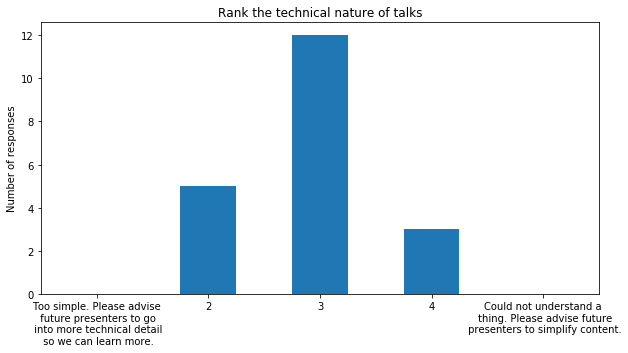

In [142]:
technical = excel_obj['How did you find the technical level of the talks?']
left = 'Too simple. Please advise\n future presenters to go\n into more technical detail\n so we can learn more.'
right = 'Could not understand a\n thing. Please advise future\n presenters to simplify content.'

tech_fig, tech_ax = slider_plot(technical, left, right,
                               title = 'Rank the technical nature of talks',
                               ylabel = 'Number of responses')
plt.savefig('../images/technical.png')

[0.5 1.5 2.5 3.5 4.5 5.5]
[0. 2. 8. 8. 2.]


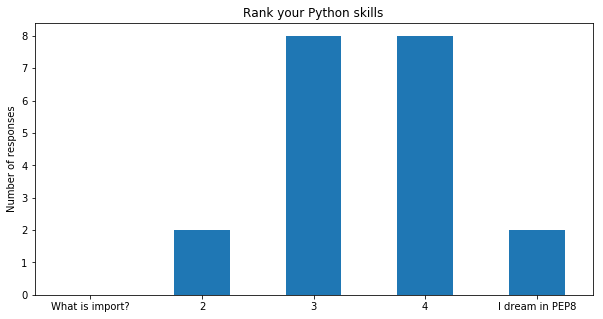

In [143]:
skills = excel_obj['Rank your python skills']
left = 'What is import?'
right = 'I dream in PEP8'
skills_fig, skills_ax = slider_plot(skills, left, right,                               
                                    title = 'Rank your Python skills',
                                    ylabel = 'Number of responses')
plt.savefig('../images/skills.png')

[0.5 1.5 2.5 3.5 4.5 5.5]
[ 0.  0.  4. 14.  2.]


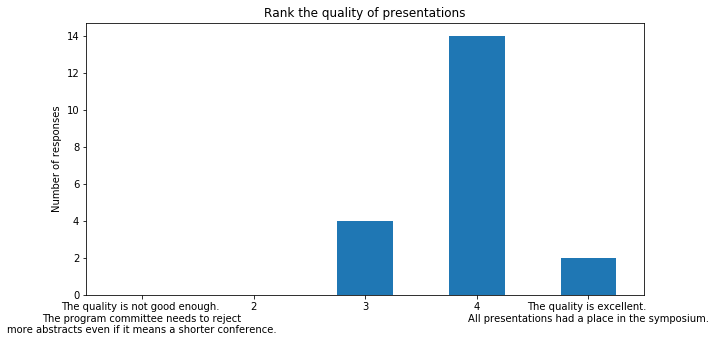

In [145]:
quality = excel_obj['Please comment on the quality of the presentations. ']
left = """The quality is not good enough. 
The program committee needs to reject
more abstracts even if it means a shorter conference."""
right = """The quality is excellent. 
All presentations had a place in the symposium."""
skills_fig, skills_ax = slider_plot(quality, left, right,                               
                                    title = 'Rank the quality of presentations',
                                    ylabel = 'Number of responses')
plt.savefig('../images/quality.png')

[0.5 1.5 2.5 3.5 4.5 5.5]
[ 0.  0. 10.  8.  2.]


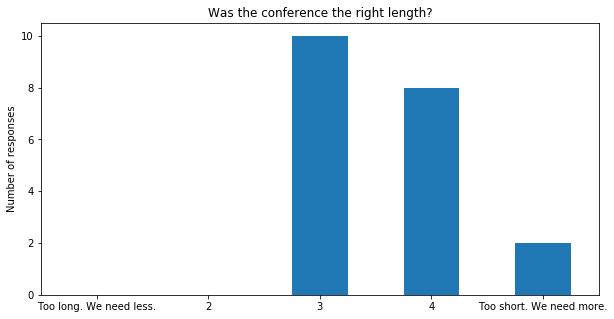

In [147]:
length = excel_obj['Was the conference the right length']
left = 'Too long. We need less.'
right = 'Too short. We need more.'
skills_fig, skills_ax = slider_plot(length, left, right,                               
                                    title = 'Was the conference the right length?',
                                    ylabel = 'Number of responses')
plt.savefig('../images/length.png')

[0.5 1.5 2.5 3.5 4.5 5.5]
[ 0.  1.  7. 11.  1.]


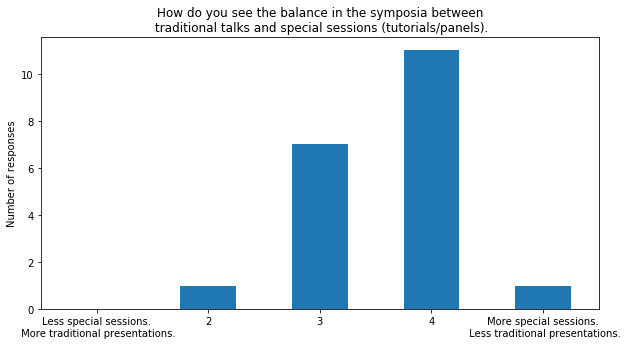

In [149]:
bal = excel_obj['How do you see the balance in the symposia between traditional talks and special sessions (tutorials/panels).']
left = 'Less special sessions.\n More traditional presentations.'
right = 'More special sessions.\n Less traditional presentations.'
skills_fig, skills_ax = slider_plot(bal, left, right,                               
                                    title = 'How do you see the balance in the symposia between\n traditional talks and special sessions (tutorials/panels).',
                                    ylabel = 'Number of responses')
plt.savefig('../images/balance.png')

[0.5 1.5 2.5 3.5 4.5 5.5]
[0. 6. 3. 8. 3.]


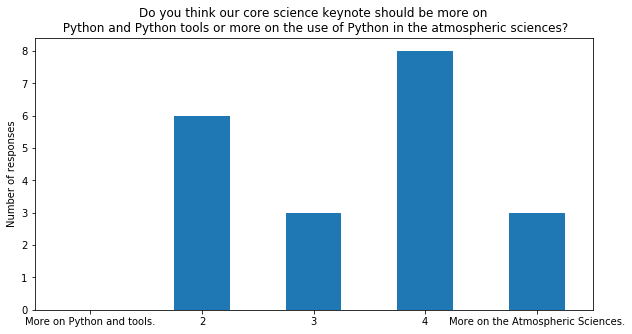

In [151]:
keynote = excel_obj['Do you think our core science keynote should be more on Python and Python tools or more on the use of Python in the atmospheric sciences?']
left = 'More on Python and tools.'
right = 'More on the Atmospheric Sciences.'
skills_fig, skills_ax = slider_plot(keynote, left, right,                               
                                    title = 'Do you think our core science keynote should be more on\n Python and Python tools or more on the use of Python in the atmospheric sciences?',
                                    ylabel = 'Number of responses')
plt.savefig('../images/keynote.png')

In [152]:
how = excel_obj['How did you hear about AMS Python 2018?']

In [194]:
master = []
for ans in how.values:
    master.append(ans.split(', '))
flattened_array = np.array([y for x in master for y in x])
uni = np.unique(flattened_array)
cnt = np.array([(flattened_array == this).sum() for this in uni])

smat = cnt.argsort()

unis = uni[smat]
cnts = cnt[smat]

In [211]:
uni

array(['AMS website', 'Discovered AMS Python at AMS 2016.', 'Email list',
       'Just turned up to talks', 'Online program',
       "previous years' attendee", 'social media', 'word of mouth'],
      dtype='<U34')

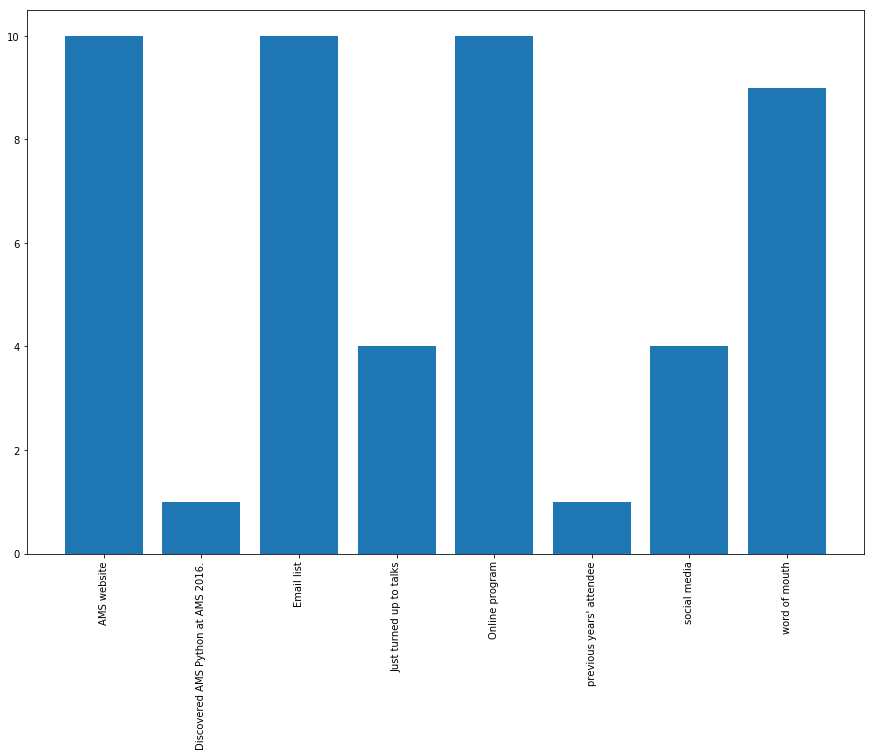

In [213]:
fig = plt.figure(figsize = [15,10])
plt.bar(unis, cnts)
ax = plt.gca()
for tick in ax.get_xticklabels():
    a = tick.get_label()
    print(a)
    tick.set_rotation(90)

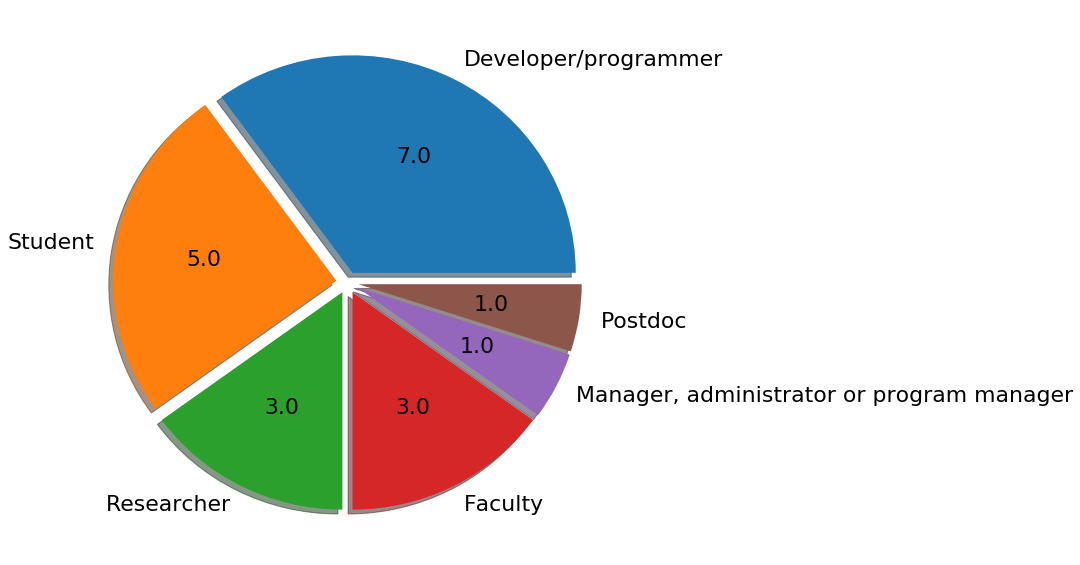

In [245]:

def absolute_value(val):
    a  = np.round(val/100.*20, 0)
    return a

who = excel_obj['Are you a']

labels = np.unique(who.values)

explode = [0.05]*len(labels)

fig = plt.figure(figsize=[10,10])
who.value_counts().plot(kind='pie', explode=explode, 
                        shadow=True, autopct=absolute_value,
                       fontsize = 22)
ax = plt.gca()
ax.set_ylabel('')
plt.savefig('../images/whoareyou.png')

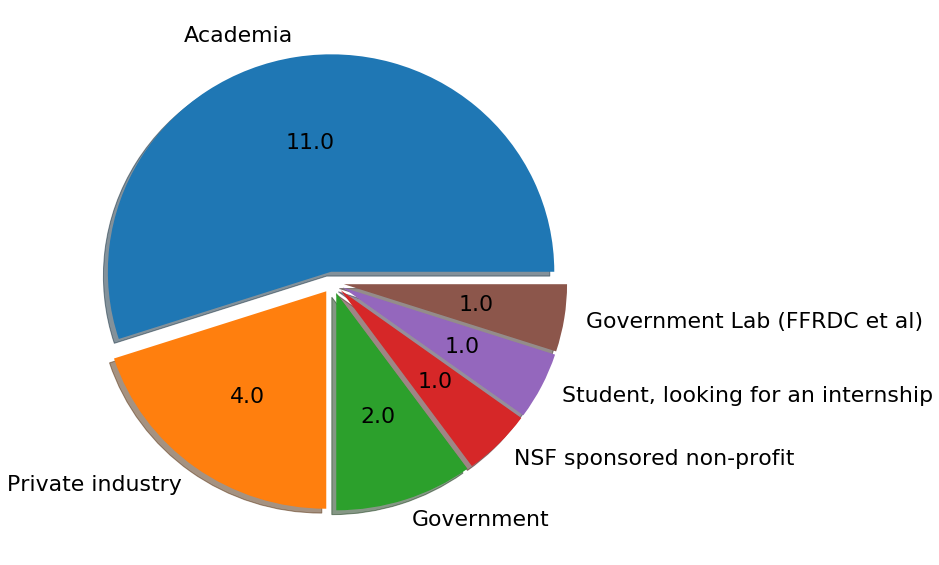

In [246]:
who = excel_obj['Do you work in']

labels = np.unique(who.values)

explode = [0.05]*len(labels)

fig = plt.figure(figsize=[10,10])
who.value_counts().plot(kind='pie', explode=explode, 
                        shadow=True, autopct=absolute_value,
                       fontsize = 22)
ax = plt.gca()
ax.set_ylabel('')
plt.savefig('../images/workin.png')

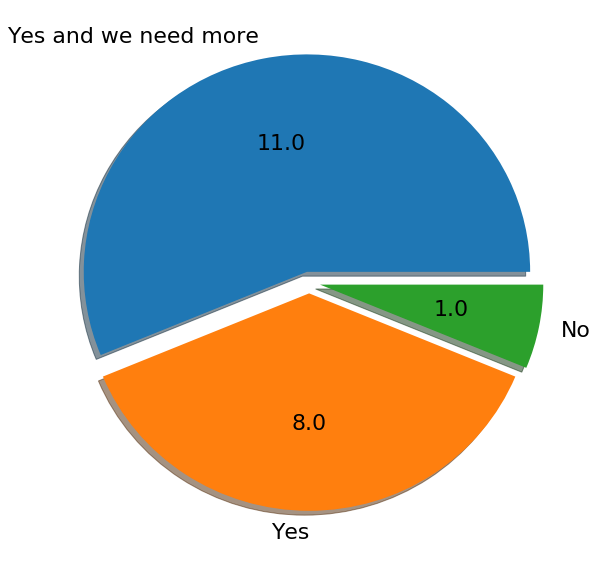

In [265]:

who = excel_obj['Were the short tutorials useful?']

labels = np.unique(who.dropna())

explode = [0.05]*len(labels)

fig = plt.figure(figsize=[10,10])
who.dropna().value_counts().plot(kind='pie', explode=explode, 
                        shadow=True, autopct=absolute_value,
                       fontsize = 22)
ax = plt.gca()
ax.set_ylabel('')
plt.savefig('../images/useful.png')

In [264]:
who.dropna()

0                      Yes
1                      Yes
2                       No
4     Yes and we need more
5                      Yes
6                      Yes
9     Yes and we need more
10    Yes and we need more
11    Yes and we need more
13                     Yes
14    Yes and we need more
15                     Yes
16    Yes and we need more
17    Yes and we need more
18    Yes and we need more
19    Yes and we need more
Name: Were the short tutorials useful?, dtype: object

In [255]:
np.isnan?